In [9]:
import numpy as np
import scipy.linalg as la

def prob1(A, b, tol=1e-10, maxiters=200):
    D = np.diag(np.diag(A))
    D_inv = np.diag(1/np.diag(A))
    L = np.triu(A, k=1)
    U = np.tril(A, k=-1)
    x0 = np.zeros_like(b)
    for k in range(maxiters): 
        x1 = x0 + np.dot(D_inv, b-np.dot(A, x0))
        if la.norm(x1 - x0) < tol: 
            break
        x0 = x1
    return x0

In [10]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = diag_dom(8)
b = np.random.random(8)

np.allclose(np.dot(A, prob1(A, b)), b)

True

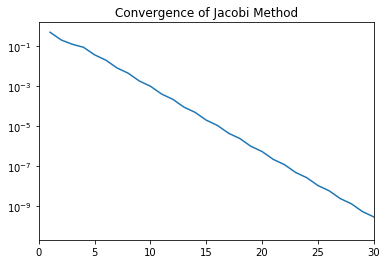

array([ 0.03631401,  0.19572457,  0.33995705, -0.00124828,  0.23312579,
        0.16246357,  0.11493482, -0.09673639])

In [11]:
# Problem 2
from matplotlib import pyplot as plt
def prob2(A, b, tol=1e-10, maxiters=200, plot=False):
    D = np.diag(np.diag(A))
    D_inv = np.diag(1/np.diag(A))
    L = np.triu(A, k=1)
    U = np.tril(A, k=-1)
    x0 = np.zeros_like(b)
    e = np.zeros(maxiters)
    for k in range(maxiters): 
        x1 = x0 + np.dot(D_inv, b-np.dot(A, x0))
        e[k] = la.norm(x1 - x0)
        if e[k] < tol: 
            break
        x0 = x1
    if plot is True:
        plt.semilogy(np.arange(1, maxiters+1), e)
        plt.title('Convergence of Jacobi Method')
        plt.xlim(0, 30)
        plt.show()
    return x0

prob2(A, b, plot=True)

True


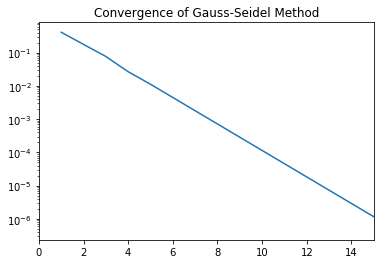

array([ 0.14824809,  0.21553245, -0.05029787,  0.1718837 ,  0.17726281,
        0.09970326,  0.2248627 ,  0.08749607])

In [13]:
# Problem 3
def prob3(A, b, tol=1e-6, maxiters=200, plot=False):
    x0 = np.zeros_like(b)
    x1 = np.zeros_like(b)
    e = np.zeros(maxiters)
    for k in range(maxiters): 
        x = np.copy(x0)
        for i in range(len(b)):
            x1[i] = x0[i] + 1/A[i, i] * (b[i] - np.dot(A[i, :].T, x0))
        e[k] = la.norm(x1 - x)
        if e[k] < tol: 
            break
        x0 = x1
    if plot is True:
        plt.semilogy(np.arange(1, maxiters+1), e)
        plt.title('Convergence of Gauss-Seidel Method')
        plt.xlim(0, 15)
        plt.show()
    return x0

A = diag_dom(8)
b = np.random.random(8)

print(np.allclose(np.dot(A, prob3(A, b)), b))
prob3(A, b, plot=True)

In [18]:
# Problem 4
import scipy.sparse as sparse

def prob4(A, b, tol=1e-6, maxiters=200):
    x0 = np.zeros_like(b)
    x1 = np.zeros_like(b)
    e = np.zeros(maxiters)
    for k in range(maxiters): 
        x = np.copy(x0)
        for i in range(len(b)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x0[A.indices[rowstart:rowend]]
            x1[i] = x0[i] + 1/A[i,i] * (b[i] - Aix)
        e[k] = la.norm(x1 - x)
        if e[k] < tol: 
            break
        x0 = x1
    return x0

A = sparse.csr_matrix(diag_dom(500))
b = np.random.random(500)
np.allclose(A@prob4(A, b), b)

True

In [28]:
# Problem 5
def prob5(A, b, w, tol=1e-6, maxiters=200):
    x0 = np.zeros_like(b)
    x1 = np.zeros_like(b)
    e = np.zeros(maxiters)
    j = 0
    for k in range(maxiters): 
        x = np.copy(x0)
        for i in range(len(b)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x0[A.indices[rowstart:rowend]]
            x1[i] = x0[i] + w/A[i,i] * (b[i] - Aix)
        e[k] = la.norm(x1 - x)
        if e[k] < tol: 
            break
        j = np.where(e<tol)[0]
        if len(j) == 0:
            j = maxiters
        else:
            j = j[0]
        x0 = x1
    return x0, j

In [29]:
# Problem 6
def prob6(n, w, tol=1e-8, maxiters=100, plot=False):
    nx, ny = n, n
    N  = nx*ny
    main_diag = np.ones(N) * (-4.0)
    side_diag = np.ones(N-1)
    side_diag[np.arange(1,N)%4==0] = 0
    up_down_diag = np.ones(N-3)
    diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
    A = sparse.diags(diagonals, [0, -1, 1,nx,-nx], format="csr")
    c = np.zeros(n)
    c[0] = -100
    c[-1] = -100
    b = np.tile(c, n)
    u = np.array(prob5(A, b, w)[0])
    u = u.reshape((n, n))
    if plot is True:
        x = np.arange(0, n + 1)
        y = np.arange(0, n + 1)
        plt.pcolormesh(x, y, u, cmap='coolwarm')
        plt.colorbar() 
        plt.show()
    return prob5(A, b, w)[1] # number of iterations

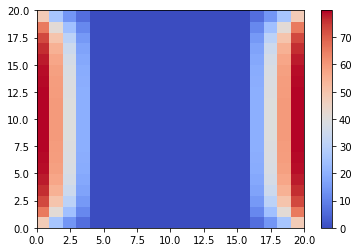

163

In [30]:
prob6(20, 0.7, plot=True)

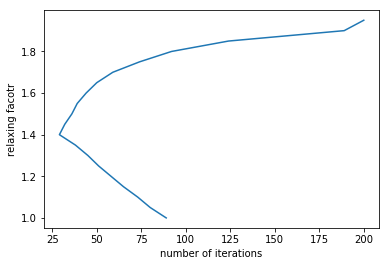

In [31]:
w = np.arange(1, 2, 0.05)
n = np.zeros_like(w)
for i in range(len(w)):
    n[i] = prob6(20, w[i], tol=1e-2, maxiters=1000, plot=False)
plt.plot(n, w)
plt.xlabel('number of iterations')
plt.ylabel('relaxing facotr')
plt.show()